![](https://um.edu.uy/sites/default/files/LogoUniversidadMontevideo.png)

# Curso de Aprendizaje Automático
## EDA y Clustering con K-Means

Importamos librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Análisis Exploratorio de Datos ( EDA )

Leemos archivos, ya están divididos en train y test

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


Veamos algunos ejemplos datos

In [4]:
# Seteamos opcion de Pandas para ver todas las columnas
pd.set_option('display.max_columns', None)
print("***** Conjunto de entrenamiento *****")
print(train.head())
print("\n")
print("***** Conjunto de test *****")
print(test.head())

***** Conjunto de entrenamiento *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

Obtengamos algunas estadísticas del dataset

In [5]:
print("***** Conjunto de entrenamiento *****")
print(train.describe())
print("\n")
print("***** Conjunto de test *****")
print(test.describe())

***** Conjunto de entrenamiento *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Conjunto de test *****
       Passe

Revisemos cuales son los features del dataset [Documentación del dataset](https://www.kaggle.com/c/titanic/data?select=train.csv)

In [6]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


K-Means puede tener problemas al tratar con valores nulos. Revisemos esto en el dataset

In [7]:
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


Veamos la cantidad de valores nulos

In [8]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Podemos ver en el conjunto de entrenamiento, en las columnas Edad, Cabina y Embarcado, hay valores nulos y en el conjunto de prueba, las columnas Edad y Cabina contienen valores nulos.

Hay un par de formas de manejar los valores nulos:

*   Eliminar filas con valores perdidos
*   Imputar valores perdidos

Apliquemos el último porque si eliminamos las filas con
 valores perdidos, podemos causar insuficiencia en los datos, lo que a su vez da como resultado un entrenamiento ineficiente del modelo.

Ahora, hay varias formas de realizar la imputación:


* Un valor constante que tiene significado dentro del dominio, como 0, distinto de todos los demás valores.

* Un valor de otro registro seleccionado al azar.
* Un valor medio o mediano para la columna.
* Un valor estimado por otro modelo de aprendizaje automático.

Cualquier imputación realizada en el conjunto de entrenamiento deberá realizarse en datos de prueba cuando se necesiten predicciones del modelo final. Esto debe tenerse en cuenta al elegir cómo imputar los valores faltantes.

Pandas proporciona la función fillna () para reemplazar los valores nulos con un valor específico. Apliquemos Mean Imputation.

In [9]:
# Sobre el conjunto de entrenamiento
train.fillna(train.mean(), inplace=True)

# Sobre el conjunto de test
test.fillna(test.mean(), inplace=True)

Revisemos que ahora no tengamos valores nulos

In [10]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Sí, puede ver que todavía faltan algunos valores en las columnas Cabina y Embarcado. Esto se debe a que estos valores no son numéricos. Para realizar la imputación, los valores deben estar en forma numérica. Hay formas de convertir un valor no numérico en uno numérico, lo vamos a ver más adelante.

Hagamos más análisis para comprender mejor los datos. Comencemos por descubrir qué features son categóricos y cuáles numéricos.

* Categóricos: sobrevivido, sexo y embarcado. Ordinal: Pclass.
* Numéricos: Edad, Tarifa. Discreto: SibSp, Parch.

Se excluyen dos características que no se enumeran anteriormente en ninguna de las categorías: Ticket and Cabina. Ticket es una combinación de tipos de datos numéricos y alfanuméricos. La cabina es alfanumérica. Veamos algunos valores de muestra.

In [11]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Veamos el recuento de sobrevivientes de los pasajeros con respecto a los siguientes features:

Pclass
Sex
SibSp
Parch


In [ ]:
# Pclass
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# Sex
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# SibSp
#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
#parch: The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Grafiquemos Edad vs Sobrevivencia

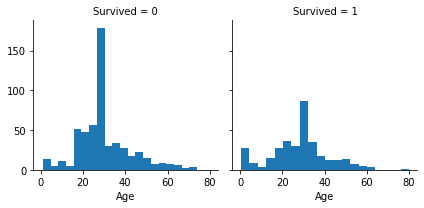

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


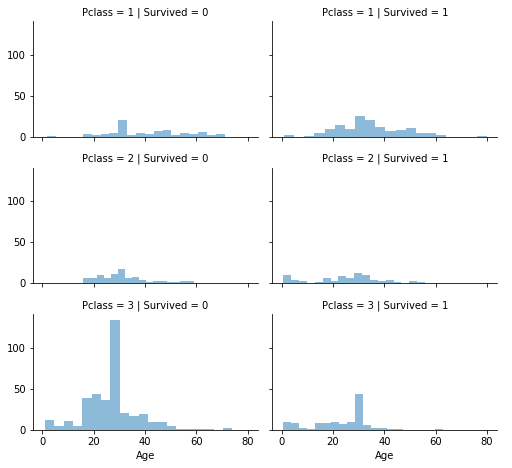

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Clustering usando K-Means

Entrenemos un modelo de K-Means con el conjunto de entrenamiento. Pero antes de eso, también vamos a tener que hacer un pre-procesamiento de los datos. Se puede ver que no todos los valores de características son del mismo tipo. Algunos de ellos son numéricos y otros no. Para facilitar el cálculo, vamos a entrenar solo con datos numéricos. Veamos los tipos de datos de los diferentes features:

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vemos que los siguientes features no son numéricos:

* Name
* Sex
* Ticket
* Cabin
* Embarked

Antes de convertirlos en números, vamos a hacer **ingenieria de atributos**, features como Name, Ticket, Cabin y Embarked no tienen ningún impacto en el estado de supervivencia de los pasajeros. En general, es mejor entrenar el modelo solo con features significativos que entrenarlo con todos los features, donde se incluyen los innecesarios. No solo ayuda en el modelado eficiente, sino que también el entrenamiento del modelo tendrá un menor costo computacional. 
Vamos a elimninar los features Name, Ticket, Cabin y Embarked 

In [13]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

Ahora vamos a convertir el feature Sex en numérico. Vamos a usar una técnica denominada Label Encoding.


In [14]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [15]:
# Revisemos los datos
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


## Clusterización con K-Means

Armamos nuestros vectores

In [16]:
# Al vector X le quitamos la columna "Survived"
X = np.array(train.drop(['Survived'], 1).astype(float))
# Generamos una columma Y solo con la columna "Survived"
y = np.array(train['Survived'])

Vamos a clusterizar...

In [17]:
# Nos interesan dos clusters: survived y not survived
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Veamos qué tan bien está funcionando el modelo, observando el porcentaje de registros de pasajeros que se agruparon correctamente.

In [18]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


Nuestro modelo pudo agruparse correctamente en un 50% (precisión de del modelo). Pero para mejorar el rendimiento del modelo, podemos modificar algunos ***hiperparámetros***. Estos son algunos de estos parámetros que proporciona la implementación de K-Means de scikit-learn:

* algorithm
* max_iter
* n_jobs

Modifiquemos los valores de estos parámetros y veamos si hay cambios en el resultado.

[Documentación de hiperparámetros](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [23]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


Hay una disminución en la precisión. Una de las razones es que no ha escalado los valores de los diferentes features con que estamos entrenando al modelo. Los features del conjunto de datos contienen diferentes rangos de valores. Entonces, lo que sucede es que un pequeño cambio en en feature no afecta al otro feature. Por lo tanto, también es importante escalar los valores de los features a un mismo rango.

Para esta prueba vamos a tomar 0 - 1 como el rango de valores uniformes para todos los features

In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
km = kmeans.fit(X_scaled)

In [27]:
correct = 0
for i in range(len(X_scaled)):
    predict_me = np.array(X_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.7867564534231201


In [28]:
Sum_of_squared_distances = []
K = range(1,2)
for k in K:
    Sum_of_squared_distances.append(km.inertia_)
print (Sum_of_squared_distances)

[290.57192641063995]
